In [8]:
#라이브러리
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 불러오기
data = pd.read_csv('제출용.csv')

# +데이터 전처리 과정 추가
data = data.dropna()

#독립변수와 종속변수 분리
X = data[['Sex','Age','BMI','Diabetes','Asthma','Smoking','AlcoholDrinking','Hyptertension','HE_IHDfh1','HE_IHDfh2','Cholesterol','MentalHealth']]
y = data['HeartDisease']

# 학습 데이터 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

#예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# 성능 평가 (1번은 정확도)
print('정확도:', accuracy_score(y_test, y_pred))

#신규 데이터 예측
new_data_1 = np.array([[1,53,19.78182931,0,0,2,4,0,0,0,0,0]]) # < 현재 심장병에 걸리지 않은 사람
new_data_2 = np.array([[1,80,21.07685811,1,1,3,6,1,1,1,1,1]]) # < 현재 심장병에 걸린사람
predicted_probabilities1 = model.predict_proba(new_data_1)
predicted_probabilities2 = model.predict_proba(new_data_2)
print("\nPredicted Probabilities:", predicted_probabilities1)
print("\nPredicted Probabilities:", predicted_probabilities2)

# 클래스 1에 대한 예측 확률 가져오기
predicted_prob_class_0 = predicted_probabilities1[0, 0]
predicted_prob_class_1 = predicted_probabilities1[0, 1]
predicted_prob_class_3 = predicted_probabilities2[0, 0]
predicted_prob_class_4 = predicted_probabilities2[0, 1]

print(f"\n첫번째 대상이 심장병에 걸리지 않을 확률은 약 {predicted_prob_class_0 * 100:.2f}%이고, 심장병에 걸릴 확률은 약 {predicted_prob_class_1 * 100:.2f}%입니다")
print(f"\n두번째 대상이 심장병에 걸리지 않을 확률은 약 {predicted_prob_class_3 * 100:.2f}%이고, 심장병에 걸릴 확률은 약 {predicted_prob_class_4 * 100:.2f}%입니다")


정확도: 0.9116702355460385

Predicted Probabilities: [[0.95908067 0.04091933]]

Predicted Probabilities: [[0.05508517 0.94491483]]

첫번째 대상이 심장병에 걸리지 않을 확률은 약 95.91%이고, 심장병에 걸릴 확률은 약 4.09%입니다

두번째 대상이 심장병에 걸리지 않을 확률은 약 5.51%이고, 심장병에 걸릴 확률은 약 94.49%입니다


C:\Users\seigi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\seigi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\seigi\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


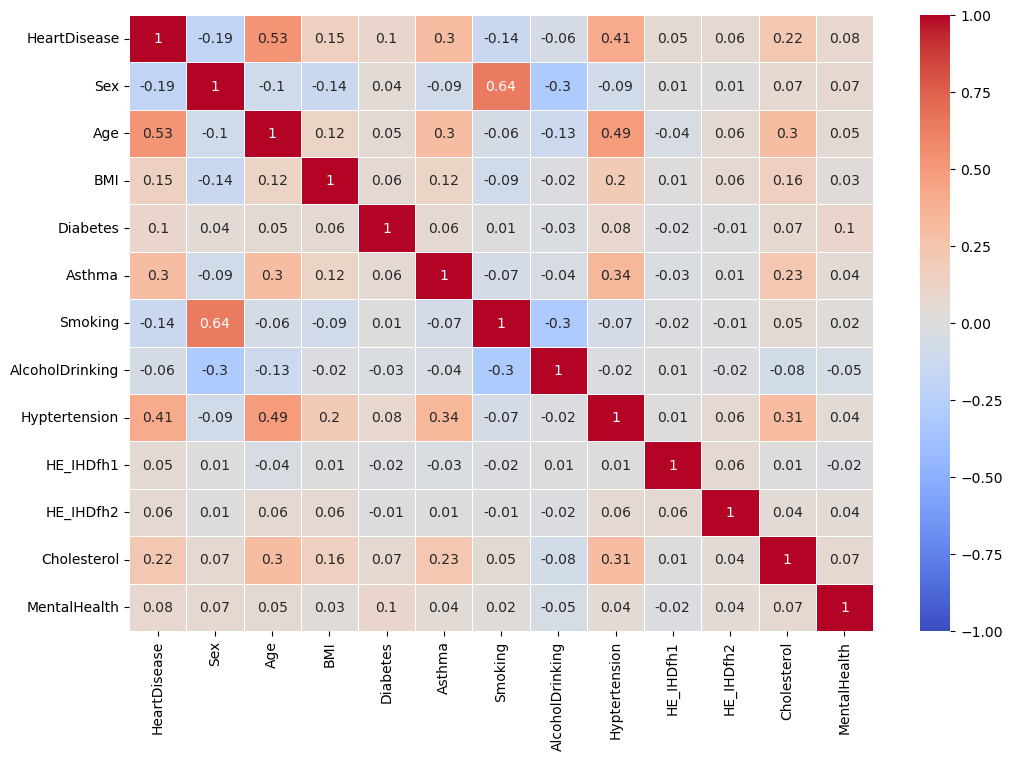

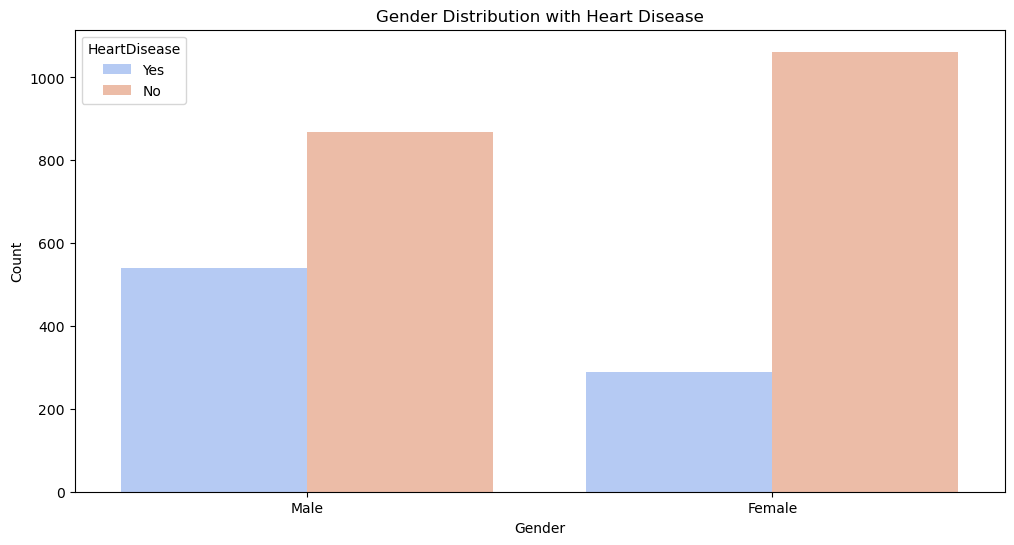

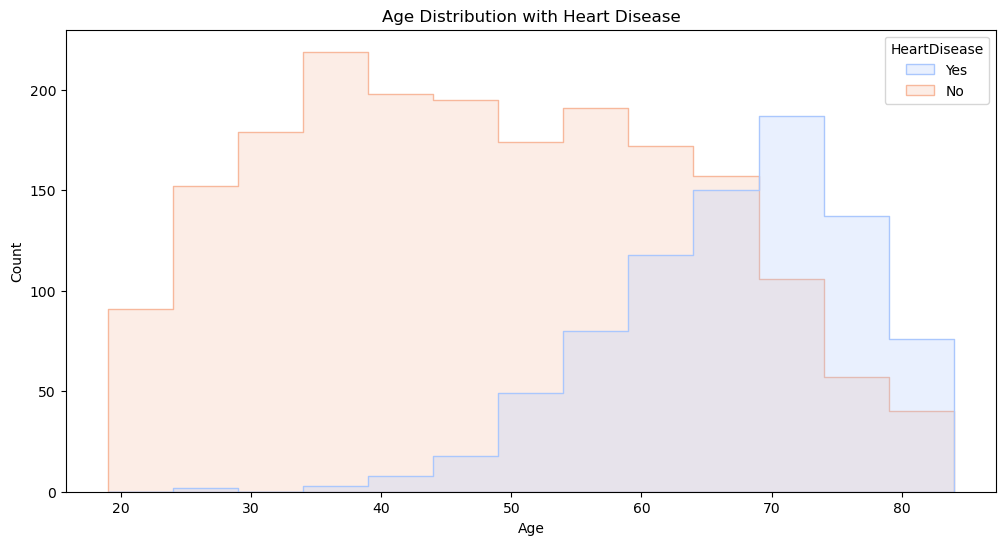

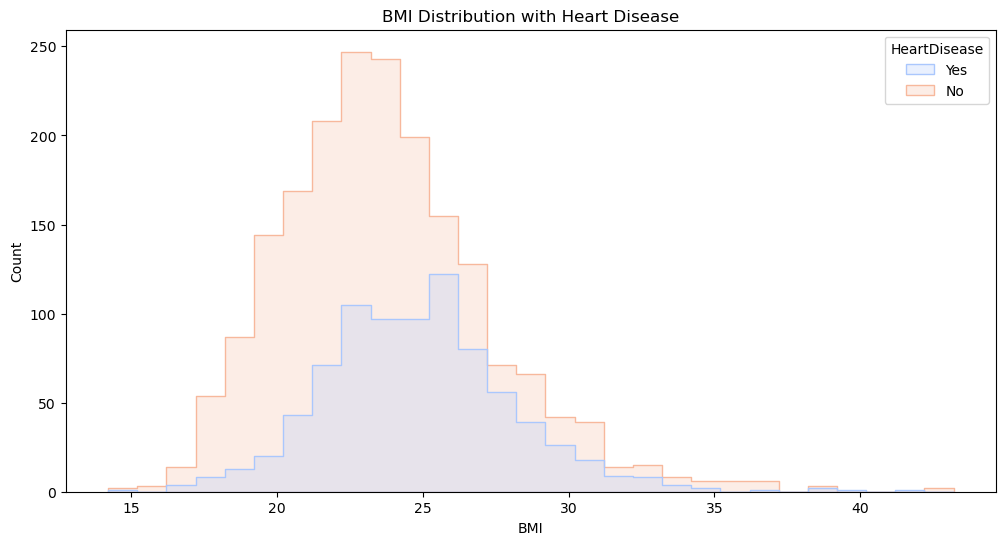

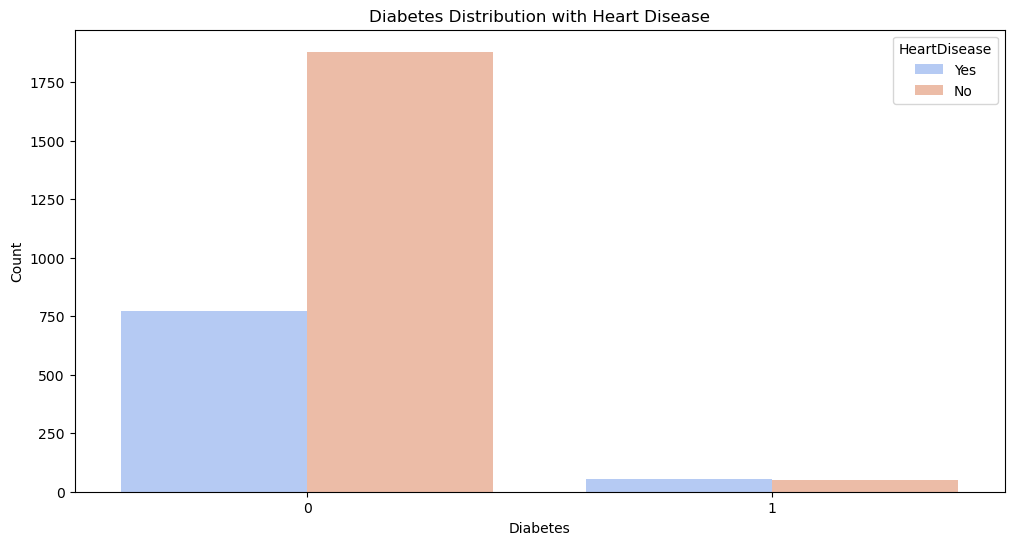

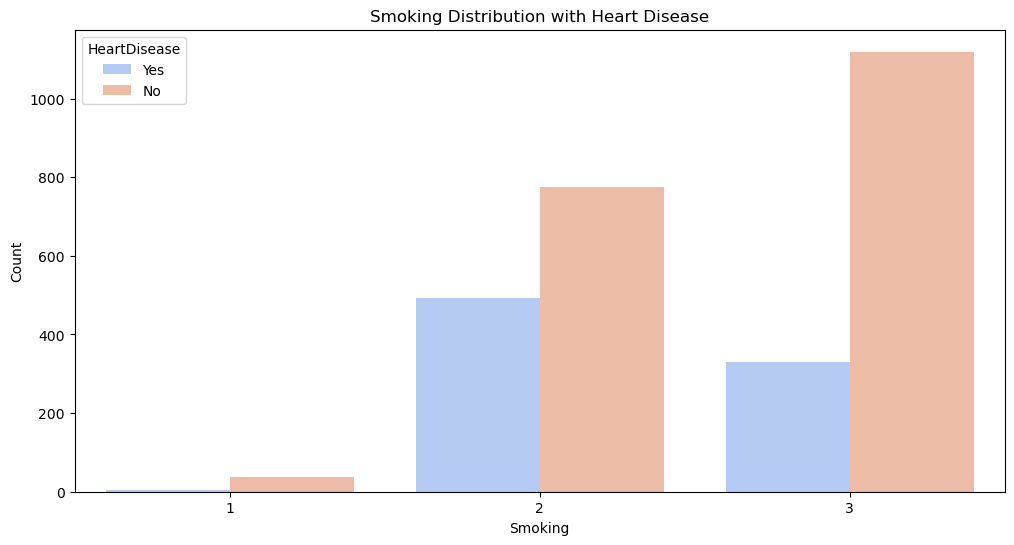

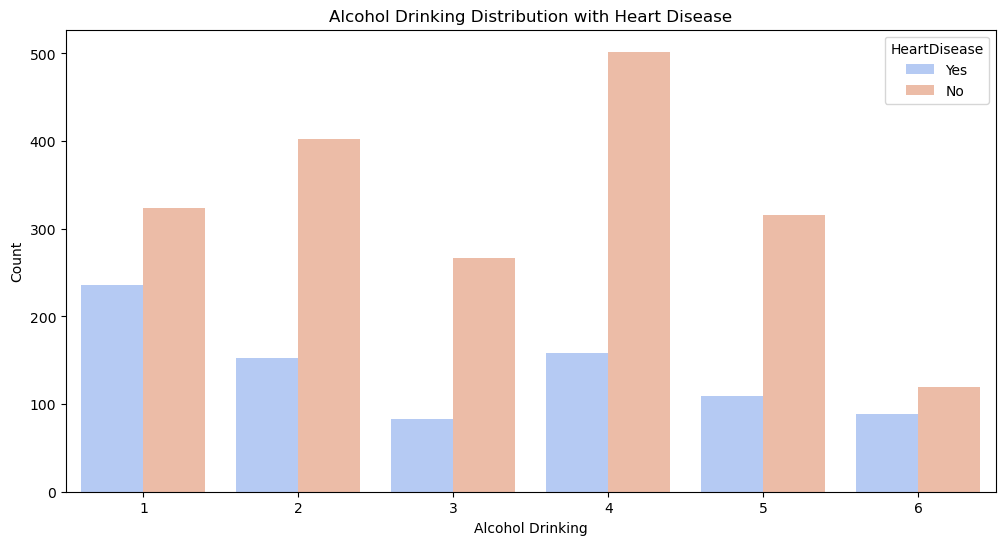

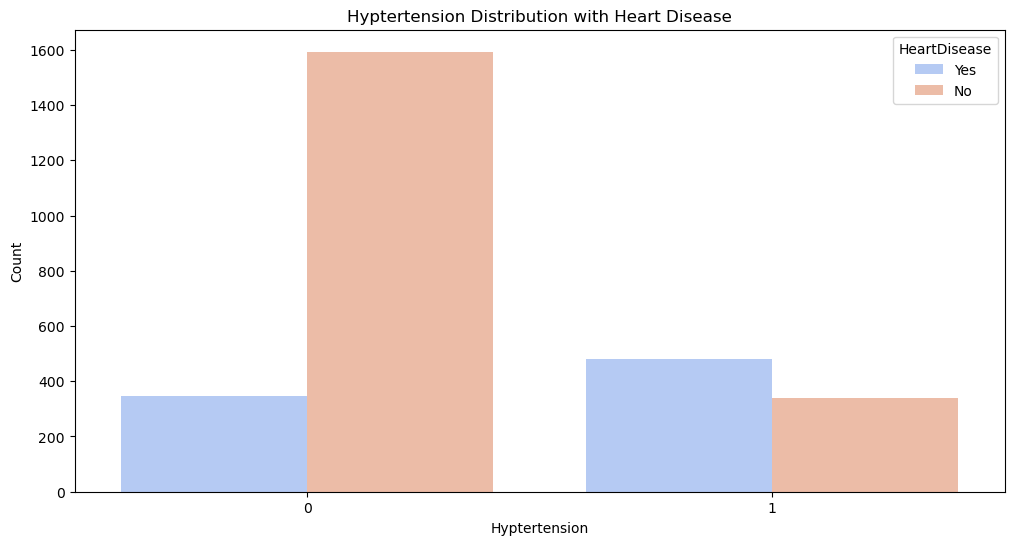

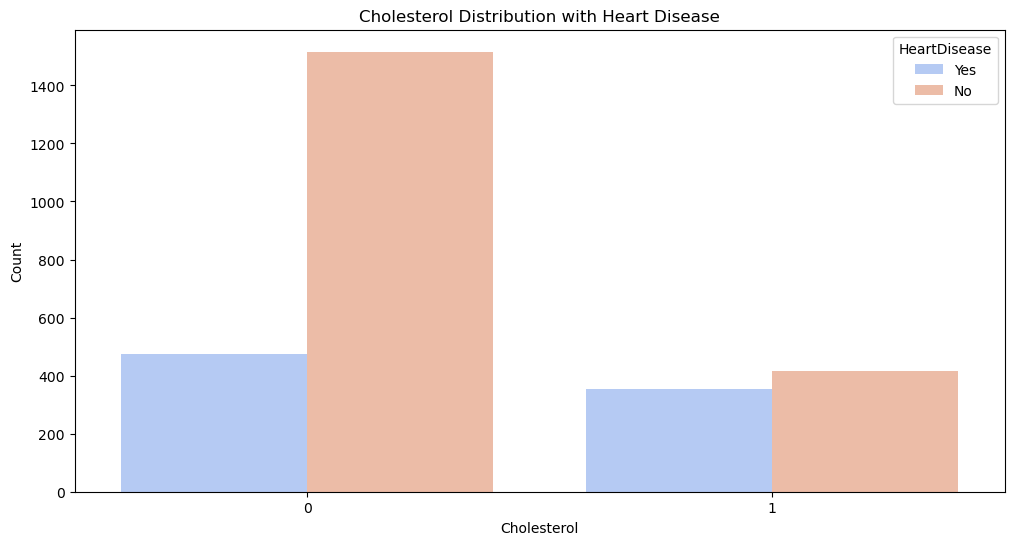

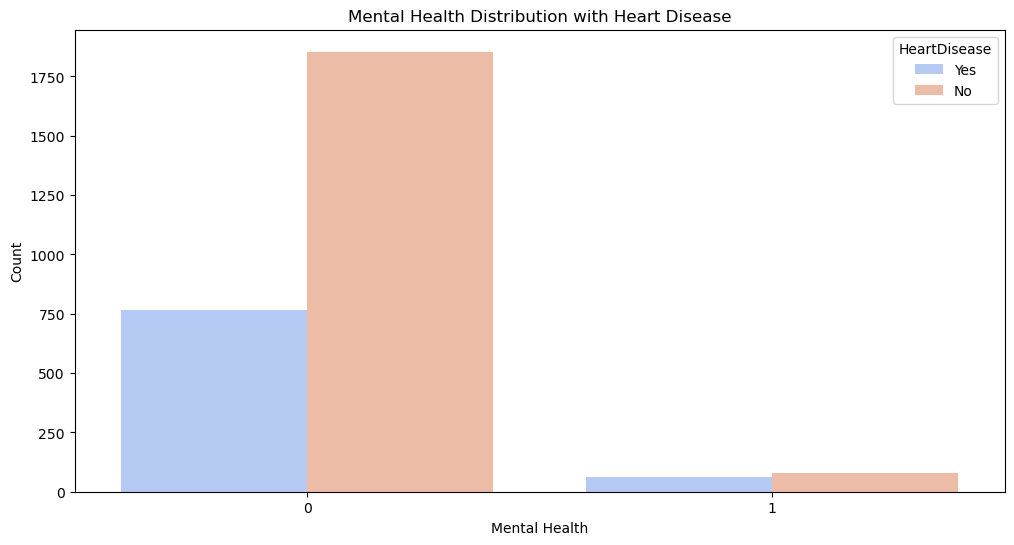

In [2]:
# 시각화 (예시로 상관 행렬 시각화)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr().round(2), cmap='coolwarm', annot=True, linewidths=.5, vmin=-1, vmax=1)
plt.show()

# 값 변환
data['HeartDisease'] = data['HeartDisease'].map({0: 'No', 1: 'Yes'})
data['Sex'] = data['Sex'].map({1: 'Male', 2: 'Female'})

# 성별에 따른 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', data=data, hue='HeartDisease', palette='coolwarm')
plt.title('Gender Distribution with Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 나이에 따른 분포
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=data, hue='HeartDisease', palette='coolwarm', element='step', stat='count', common_norm=False, binwidth=5)
plt.title('Age Distribution with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# BMI에 따른 분포
plt.figure(figsize=(12, 6))
sns.histplot(x='BMI', data=data, hue='HeartDisease', palette='coolwarm', element='step', stat='count', common_norm=False, binwidth=1)
plt.title('BMI Distribution with Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# 당뇨에 따른 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='Diabetes', data=data, hue='HeartDisease', palette='coolwarm')
plt.title('Diabetes Distribution with Heart Disease')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# 흡연 여부에 따른 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='Smoking', data=data, hue='HeartDisease', palette='coolwarm')
plt.title('Smoking Distribution with Heart Disease')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

# 음주 여부에 따른 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='AlcoholDrinking', data=data, hue='HeartDisease', palette='coolwarm')
plt.title('Alcohol Drinking Distribution with Heart Disease')
plt.xlabel('Alcohol Drinking')
plt.ylabel('Count')
plt.show()

# 고혈압 여부에 따른 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='Hyptertension', data=data, hue='HeartDisease', palette='coolwarm')
plt.title('Hyptertension Distribution with Heart Disease')
plt.xlabel('Hyptertension')
plt.ylabel('Count')
plt.show()

# 고콜레스테롤 여부에 따른 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='Cholesterol', data=data, hue='HeartDisease', palette='coolwarm')
plt.title('Cholesterol Distribution with Heart Disease')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

# 정신건강 여부에 따른 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='MentalHealth', data=data, hue='HeartDisease', palette='coolwarm')
plt.title('Mental Health Distribution with Heart Disease')
plt.xlabel('Mental Health')
plt.ylabel('Count')
plt.show()

In [5]:
data

,HeartDisease,Sex,Age,BMI,Diabetes,Asthma,Smoking,AlcoholDrinking,Hyptertension,HE_IHDfh1,HE_IHDfh2,Cholesterol,MentalHealth
0,0,1,61,25.987394,0,0,2,5,1,0,0,0,0
1,0,1,53,19.781829,0,0,2,4,0,0,0,0,0
2,0,2,50,26.631647,0,0,2,2,0,0,0,0,1
3,0,1,80,26.681078,0,0,3,1,1,0,0,0,0
4,0,2,70,26.298385,0,0,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,1,1,67,25.640138,0,0,2,3,1,0,0,1,0
9335,1,1,73,26.158593,0,0,2,4,1,0,0,0,0
9336,1,1,71,27.349854,0,1,3,4,1,0,0,1,0
9337,1,1,62,17.363177,0,0,2,5,0,1,0,0,0
